In [14]:
import keras
import pandas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
x_flat = x_train.reshape((x_train.shape[0], -1))
df = pandas.DataFrame(x_flat)
df['label'] = y_train

In [17]:
x_train_nn = x_train.astype('float32') / 255.0
x_test_nn = x_test.astype('float32') / 255.0
x_train_nn = x_train_nn.reshape((x_train_nn.shape[0], 28*28))
x_test_nn = x_test_nn.reshape((x_test_nn.shape[0], 28*28))
y_train_nn = to_categorical(y_train, 10)
y_test_nn = to_categorical(y_test, 10)

In [18]:
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(784,)),
#     Dense(64, activation='relu'),
#     Dense(10, activation='softmax')
# ])

model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/home/gabriel/mypy/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
history = model.fit(x_train_nn, y_train_nn, epochs=15, batch_size=64, validation_split=0.1)

Epoch 1/15


2025-10-08 15:33:02.829605: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-08 15:33:02.829630: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-08 15:33:02.829729: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-08 15:33:02.829739: I external/l

822/844 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8105 - loss: 0.5952

2025-10-08 15:33:09.500522: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-08 15:33:09.500548: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-08 15:33:09.500567: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-08 15:33:09.500629: I external/l

844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8128 - loss: 0.5883

2025-10-08 15:33:17.285493: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-08 15:33:17.481954: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_77', 4 bytes spill stores, 4 bytes spill loads

2025-10-08 15:33:17.482064: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_77', 8 bytes spill stores, 8 bytes spill loads

2025-10-08 15:33:17.922523: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_91', 116 bytes spill

844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.8993 - loss: 0.3316 - val_accuracy: 0.9710 - val_loss: 0.0980
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9561 - loss: 0.1500 - val_accuracy: 0.9710 - val_loss: 0.0946
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9649 - loss: 0.1152 - val_accuracy: 0.9755 - val_loss: 0.0892
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9714 - loss: 0.0963 - val_accuracy: 0.9782 - val_loss: 0.0749
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9744 - loss: 0.0878 - val_accuracy: 0.9815 - val_loss: 0.0632
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9769 - loss: 0.0774 - val_accuracy: 0.9825 - val_loss: 0.0618
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9797 - loss: 0.0678 - val_accuracy: 0.9793 - val_loss: 0.0634
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9810 - loss: 0.0617 - val_accuracy: 0.9833 - va

In [20]:
model.save("mnist_model.keras")

2025-10-08 15:33:34.640517: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-08 15:33:35.763026: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_91', 100 bytes spill stores, 100 bytes spill loads



309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.9782 - loss: 0.0791

2025-10-08 15:33:37.172776: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_84', 8 bytes spill stores, 8 bytes spill loads

2025-10-08 15:33:37.264590: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_84', 8 bytes spill stores, 8 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9824 - loss: 0.0656
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


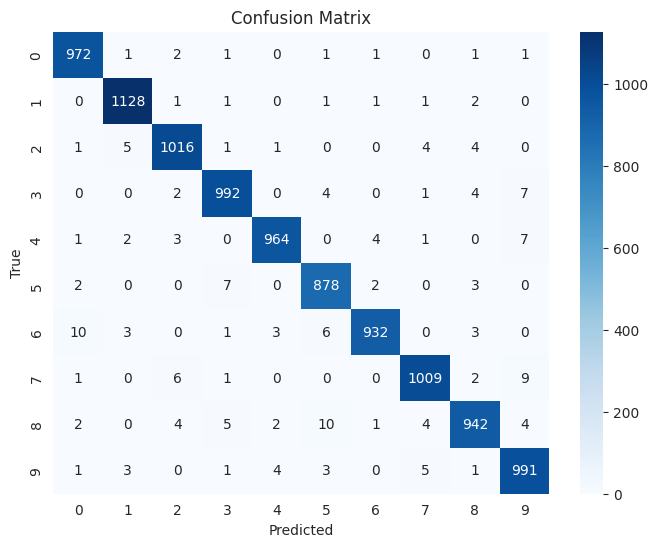

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.97      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Test accuracy: 0.9824


In [21]:
loss, accuracy = model.evaluate(x_test_nn, y_test_nn)

pred_probs = model.predict(x_test_nn)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test_nn, axis=1)

cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(true_classes, pred_classes))
print(f'Test accuracy: {accuracy:.4f}')

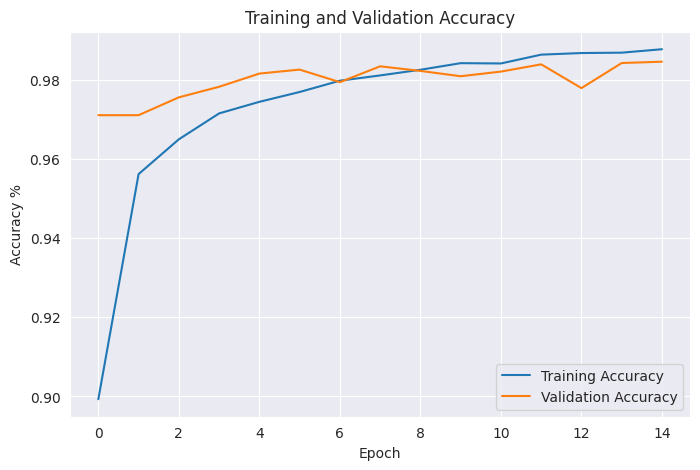

In [22]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

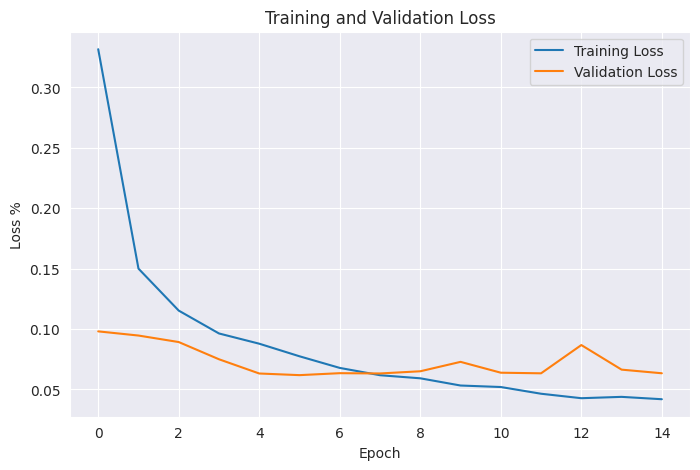

In [23]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss %')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()